### A $k$-armed Bandit Problem

Consider the following problem, you're faced repeatedly with a choice among $k$ different options, or actions. After each choice you receive a numerical reward chosen from a stationary probability distribution that depends on the action you selected. Your objective is to maximize the expected total reward over some time period, for example, over 1000 action selections, or time steps.

This is the original $k$-armed bandit problem, so named by analogy to a slot machine, or "one-armed bandit," except that it has k levers instead of one. Each action selection is like a play of one of the slot machine's levers, and the rewards are the payoffs for hitting the jackpot.

In this $k$-armed problem, each of the $k$ actions has expected or mean reward given by a action selected.

We denote action selected on time step $t$ as $A_t$, corresponding reward as $R_t$, The value of an arbitrary action $a$ at time step $t$ as $q_{*}(a)$, is the expected reward given that $a$ is selected:

$$q_{*}(a) = \mathbb{E}[R_t | A_t = a] = \sum_r p(r | a) \times r$$

Assume that we do not know the action values, only estimates it; We denote that value of action $a$ at time step $t$ as $Q_t(a)$. And hope that $Q_t(a)$ is close to $q_{*}(a)$.

### Action-value Methods

Consider the following $Q_t(a)$ rules:

$$Q_t(a) = \frac{R_1 + R_2 + \cdot + R_{N_t}(a)}{N_t(a)}= \frac{\sum_{i = 1}^{t - 1} R_i \cdot \mathbb{1_{\text{predicate}}}_{A_i = a}}{\sum_{i = 1}^{t - 1} \mathbb{1_{\text{predicate}}}_{A_i = a}}$$

Where:
- $\mathbb{1}_{\text{predicate}}$: the random variable that is 1 if **predicate** is true and 0 if it is false.
- $N_t(a)$: the number of times that action $a$ has been selected prior to time $t$.
- $R_i$: the reward received after the $i$-th selection of action $a$.

If the denominator is zero, we set $Q_t(a)$ to some default value, such as 0. With denominator going to infinity, by law of large numbers, $Q_t(a)$ converges to $q_{*}(a)$. We call this method **sample-average method**.

This is just one way to estimate action values, and not necessarily the best way. For now we will stick with this method and turn to the question of how the estimate might be used to make action selection decisions.

The simplest action selection rule is to select one of the actions with the highest estimated value, which call **greedy action selection**:

$$Q_t(A^*_t) = \text{max}_{a} Q_t(a)$$

Or more formally:

$$A_t = \text{argmax}_{a} Q_t(a)$$

Where:
- $\text{argmax}_{a}$: denotes the action a for which the expression that follows is maximized.

Greedy action will alway choose to exploit the current best action, but it may not be the best way to explore the environment, but maximize immediate reward. We can also use **($\epsilon$; near)-greedy action selection** which is a alternative way to balance exploration and exploitation:

$$A_t = \begin{cases} \text{argmax}_{a} Q_t(a) & \text{with probability } 1 - \epsilon \\ \text{a random action} & \text{with probability } \epsilon \end{cases}$$

This will make sure that we explore the environment and not get stuck in local optima, satisfying the exploration-exploitation trade-off and ensuring $Q_t(a)$ converge to $q_{*}(a)$.

### The 10-armed Testbed

To be able to test the effectiveness of greedy and $\epsilon$-greedy action-value methods, we will compare on a set of test problems. This is a set of 2000 random $k$-armed bandit songs with $k = 10$. For each problem, action values ​​$q^*(a)$, $a = 1, \cdot, 10$ will be randomly selected in a normal (gaussian) distribution with mean $0$ and varian $1$.

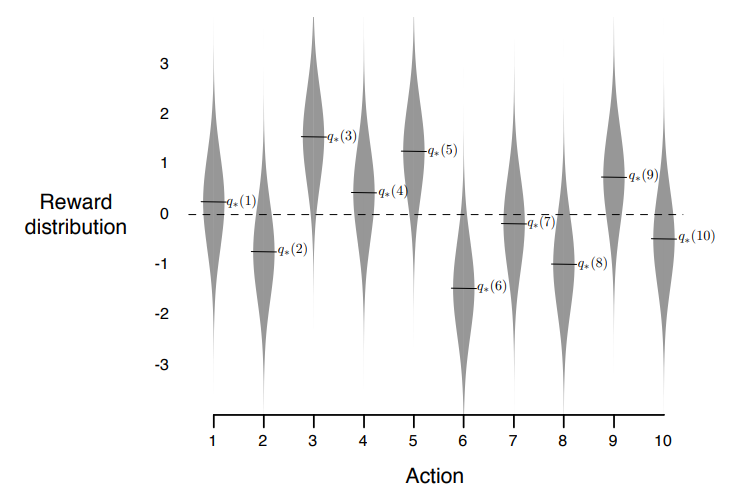

The graph can be said: When choosing an action $a$ at any time step $t$, the reward $R_t$ will be selected randomly from a distribution

We can measure its performance and behavior as it improve with experience over 1000 time steps when applied to the bandit problems. This make up one ***run*** (later call ***episode***).

**Note**: All the exploit & explore balance methods can be beneficial in different scenarios, and the best method will depend on the problem at hand.

### Incremental Implementation

To simplify notation, we concentrate on a single acction. Let $R_i$ denote the reward received after the $i$-th selection of this action, and let $Q_n$ denote the estimate of its action value after it has been selected $n - 1$ times. Then we can write the update rule for $Q_n$ as:

$$Q_n = \frac{R_1 + R_2 + \cdot + R_{n - 1}}{n - 1}$$

When we choose new action, we recieve a reward $R_n$ and we can update $Q_n$. We can save all the reward but it is not necessary, even can be computationally expensive. We can use the following incremental implementation:

$$Q_{n + 1} = \frac{R_1 + R_2 + \cdot + R_{n - 1} + R_n}{n}$$

Because $\sum_{i = 1}^{n - 1} R_i = (n - 1)Q_n$, we can rewrite the above equation as:

$$Q_{n + 1} = \frac{1}{n} \sum_{i = 1}^n R_i= \frac{(n - 1)Q_n + R_n}{n} = Q_n + \frac{1}{n}[R_n - Q_n]$$

A general form of this update rule is:

$$\text{NewEstimate} \leftarrow \text{OldEstimate} + \text{StepSize}[\text{Target} - \text{OldEstimate}]$$

Where:
- $\text{StepSize}$: a sequence of positive numbers.
- $\text{Target}$: the target value that we want to estimate.

Look like gradient descent right ? But we will not take minimum value of the loss function, we will take the value of the target.

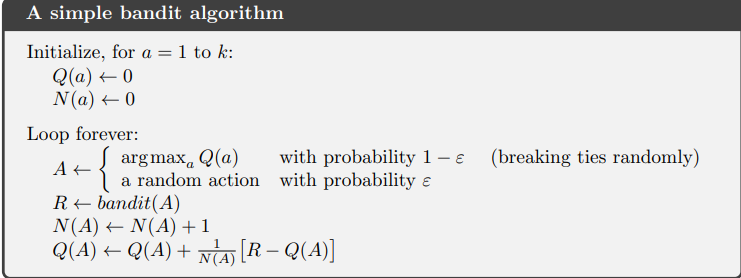

### Tracking a Nonstationary Problem

The above method is for stationary problem, but in reality, the bandit problem is nonstationary. The true value of each action, $q_*(a)$, changes over time. One of the most popular ways of doing this is to use a constant step-size parameter:

$$Q_{n + 1} = Q_n + \alpha[R_n - Q_n]$$

Where:
- $\alpha$: a constant step-size parameter, $0 < \alpha \leq 1$.

This results in $Q_{n + 1}$ being a weighted average of past rewards and the initial estimate $Q_1$:

$$
\begin{aligned}
Q_{n+1} 
&= Q_n + \alpha \bigl[R_n - Q_n\bigr] \\
&= \alpha R_n \;+\; (1 - \alpha)\,Q_n \\
&= \alpha R_n \;+\; (1 - \alpha)\bigl[\alpha R_{n-1} + (1-\alpha)\,Q_{n-1}\bigr] \\
&= \alpha R_n \;+\; (1 - \alpha)\,\alpha R_{n-1} \;+\; (1 - \alpha)^2 Q_{n-1} \\
&= \alpha R_n \;+\; (1 - \alpha)\,\alpha R_{n-1} \;+\; (1 - \alpha)^2 \,\alpha R_{n-2} \;+\; \dots \\[-0.6em]\\
&\quad\;\;+\;(1-\alpha)^{n-1}\,\alpha R_1 \;+\;(1-\alpha)^n Q_1 \\
&= (1 - \alpha)^n \,Q_1 
\;+\; \sum_{i=1}^n \alpha \,(1-\alpha)^{\,n-i} \,R_i \,.
\end{aligned}
$$


We called **weighted average of past rewards** because:

$$(1 - \alpha)^n + \sum_{i = 1}^{n} \alpha(1 - \alpha)^{n - i} = 1$$

- $\alpha(1 - \alpha)^{n - i}$ is the weight given to the reward $R_i$ depending on how far in the past it was received.
- $(1 - \alpha) < 1$ will make the weight of the past rewards decrease exponentially (exponential decay).
- If $1 - \alpha = 0$ or $\alpha = 1$, then all the weight goes on the very last reward. which if we replace $\alpha = 1$, we get:
$$ Q_{n + 1} = R_n $$

Because it gives large weight to the most recent observations and gradually reduces the old observations, it is also called ***exponential recency-weighted average***.

Sometime it's convenient to vary the step-size parameter, $\alpha$ from step to step. Set $a_n(a)$ is a step-size used to update recieve reward $R_n$ after $n$ time choosing action $a$. Note that, choose $a_n(a) = \frac{1}{n}$ is the result in the sample-average method, which is confirmed to converge to true action values ​​by the algebraic theorem. Sadly, convergence is not guaranteed with every choice of the series ${a_n(a)}$.

A common result in stochastic approximation theory gives us a condition to ensure convergence with probability $1$:

$$\sum_{n = 1}^{\infty} a_n(a) = \infty \quad \text{and} \quad \sum_{n = 1}^{\infty} a_n^2(a) < \infty$$

Meaning of two above conditions:
- $\sum \alpha_n = \infty$: the step-size is large enough to "overcome" the initial effects in the long run.
- $\sum \alpha_n^2 < \infty$: the step-size is small enough to ensure convergence.

With $\alpha_n(a) = \frac{1}{n}$, this two conditions are satisfied, and the sample-average method converges to the true action values.

But with a fixed step-size ($\alpha_n = \alpha$ - constant), but the second condition is not satisfied, leading to the estimated value not completely converging: it always "follows" the latest observations.

But in practice where environments are nonstationary, the constant step-size method is often used because it is simple and effective. But to satisfy the two conditions, sequences of step-sizes often converge very slowly or need to considerable tuning in order to obtain a good performance.

### Optimistic Initial Values

Another way to encourage exploration is to set the initial action values to high value, which is higher than the expected value of the rewards. This will encourage exploration because the agent will be more likely to select actions that it has not tried before. This is called ***optimistic initial values***.

If we try it on a $\epsilon$-greedy method we starting number of Q is $0$, with $\epsilon = 0.1$ then the results will more likely poors because the agent may rarely choose to explore all the option around. But if we set Q higher than the "expectation value" (which we measure) then with or without $\epsilon$, the method will force itself to explore due to the **exploitation**.

But there's still some limitations of this way:
- Optimistic initial values only drive early exploration.
- Not well-suited for non-stationary problems.
- We don't know which optimistic initial value should be.

### Upper-Confidence-Bound Action Selection

Exploration step is needed to accurately estimate the action values. All the greedy actions are those that look best at the present, but some of other maybe better in the long run. $\epsilon$-greedy action selection is simple, and effective but it obiviously seem not that good, because this force the algorithm to explore instead. It would be better to select among the non-greedy actions according to their potential for actually being optimal, taking into account both how close their estimates are to being maximal and the uncertainties in those estimates. One effective way to of doing this is to select actions according to:

$$A_t = \text{argmax}_{a} [Q_t(a) + c \sqrt{\frac{\ln t}{N_t(a)}}]$$

Where:
- $c > 0$: a parameter that determines the amount of exploration.
- $\ln t$: the natural logarithm of $t$.
- If $N_t(a) = 0$, then $a$ is considered to be a maximizing action.
- $Q_t(a)$: represents of the exploitation part ; $c \sqrt{\frac{\ln t}{N_t(a)}}$ is the exploration part.

The equation above called UCB, used to solve the exploration-exploitation trade-off by selecting actions based on the upper confidence bound of the estimated action values by not only choosing the greedy action by it estimated value but also considering the uncertainty of the estimate.

How it works:
- Each time an action $a$ is select, we reduce the **uncertainty** of $a$ (increase $N_t(a)$) make the UCB value decrease.
- When an action $a$ is not selected, $t$ still increase, while $N_t(a)$ does not, make the UCB value increase.
- Target is to ***make sure all the un-selected actions will be explored in the future***, because the UCB value is higher, may contain the optimal reward value.

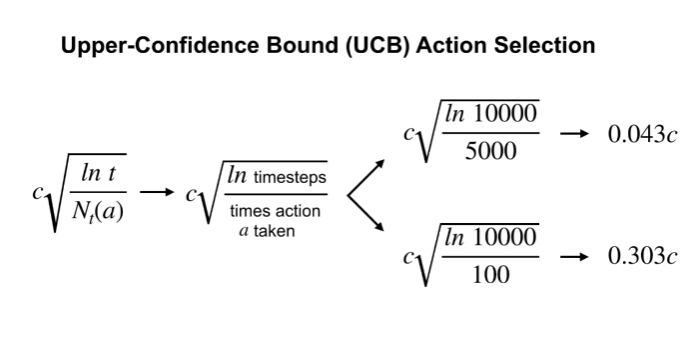

This method work well in 10-armed testbed compare to $\epsilon$-greedy . But it got some drawbacks when dealing with real-world problems:
- Environment is not stationary, the UCB value will be biased to the action that has been selected more often.
- Difficult to dealing with large state spaces or using function approximation.

$\Rightarrow$ Apply UCB become more difficult in practice.

### Gradient Bandit Algorithms

So far, we have considered methods that estimate the action values and use those estimates to select actions. This is often a good approach, but it is not the only one possible. Consider learning a **numerical preference** for each action $a$, denote $H_t(a) \in \mathbb{R}$. The larger the preference, the more often that action is taken, but the **preference** does not meaning related in term of reward. Thus only one action over another is important.

Also this represent a relative preference, only the differences between the preferences matter. Even if we add a constant to all the preferences, the action selection probabilities remain the same. The propability of selecting action computed by the **softmax distribution** (Gibbs or Boltzmann distribution):

$$\pi_t(a) = Pr\{A_t = a\} = \frac{e^{H_t(a)}}{\sum_{b = 1}^{k} e^{H_t(b)}}$$

Where:
- $\pi_t(a)$: the probability of selecting action $a$ at time $t$.
- $k$: the number of actions.
- $e$: the base of the natural logarithm.

After choosing a action $A_t$ and receiving a reward $R_t$, we can update the $H_{t + 1}(a)$ under stochastic gradient ascent algorithm:

- With choosing action $A_t$:
$$H_{t + 1}(A_t) = H_t(A_t) + \alpha(R_t - \bar{R}_t)(1 - \pi_t(A_t))$$

- Other action $a \neq A_t$:
$$H_{t + 1}(a) = H_t(a) - \alpha(R_t - \bar{R}_t)\pi_t(a)$$

Where:
- $\bar{R}_t$: or **baseline**, is the average of all the rewards up to time $t$.
    - Target is to compare the reward $R_t$ with the average reward $\bar{R}_t$.
    - If $R_t$ is greater than $\bar{R}_t$, then the preference of $A_t$ will be increased. Otherwise, it will be decreased.

**Why we do that**:
1. Action choosing $A_t$:
- If $R_t > \bar{R}_t$, we want to increase probability of choosing $A_t$ next time ($\pi_t(A_t)$). The formula have $+$ sign.
- Constant $(1 - \pi_t(A_t))$ tell us that, if the probability of choosing $\pi_t(A_t)$ is small, we re-enforce the preference of $A_t$.

2. Other action $a \neq A_t$:
- Preference decrease by a amount $\alpha(R_t - \bar{R}_t)\pi_t(a)$.
- If action $A_t$ has been choose and return a better reward than the **baseline**, then the probability of choosing $A_t$ will be increased, and the probability of choosing other action will be decreased.
- If $R_t < \bar{R}_t$, the preference for other action will be increased. Encourage the agent to explore other. ($-$ sign)

**Baseline role in the formula**:
- $\bar{R}_t$ is the average reward up to time $t$.
- If the environment is nonstationary, the average reward can be change by using exponential recency-weighted average.
- If we remove the baseline, the algorithm will still work, but when the reward have a large value and different from expected value, then preference after update will be "unstable", leading to bad performance.
- If we move all the distribution by an $k$ value, the baseline will move with the same amount, help the algorithm to be more stable or we say "quick adaptation".

#### Deeper Insight of Gradient Bandit Algorithms (Optional)

In an exact *gradient ascent*, each action preference $H_t(a)$ would be incremented in proportion to the increment effect on performance:

$$H_{t + 1}(a) = H_t(a) + \alpha \frac{\partial \mathbb{E}[R_t]}{\partial H_t(a)}$$

where the measure of performance here is expected reward:

$$\mathbb{E}[R_t] = \sum_{x} \pi_t(a)q^*(a)$$

Of course, it's not possible to implement gradient ascent exactly in our case because by assumption, the true action values $q^*(a)$ are unknown. But we can update the Gradient Bandit Algorithms (softmax distribution) to that form. First let's analyze the gradient:

$$
\begin{aligned}
\frac{\partial \mathbb{E}[R_t]}{\partial H_t(a)} &= \frac{\partial}{\partial H_t(a)} \sum_{x} \pi_t(a)q_*(a) \\
&= \sum_{x} q_*(a) \frac{\partial \pi_t(a)}{\partial H_t(a)} \\
&= \sum_{x} (q_*(a) - B_t) \frac{\partial \pi_t(a)}{\partial H_t(a)}
\end{aligned}
$$

Where $B_t$ is the baseline, can be any scalar value without affecting the result. This is because the gradient sums to zero over all the actions:

$$\sum_{x} \frac{\partial \pi_t(a)}{\partial H_t(a)} = 0$$

As $H_t(a)$ is updated, the probability of selecting action $a$ will change, but sum of the changes must be zero because the sum of the probabilities must be one.

Next we multiply each term with $\frac{\pi_t(a)}{\pi_t(a)}$:

$$
\frac{\partial \mathbb{E}[R_t]}{\partial H_t(a)} = \sum_{x} \pi_t(a) \frac{q_*(a) - B_t}{\pi_t(a)} \frac{\partial \pi_t(a)}{\partial H_t(a)}

The equation is now in the form of an expectiation:

$$
\begin{aligned}
&= \mathbb{E}[(q_*(a) - B_t) \times \frac{\partial \pi_t(A_t)}{\partial H_t(a)} / \pi_t(A_t)]  \\
&= \mathbb{E}[(R_t - \bar{R}_t) \times \frac{\partial \pi_t(A_t)}{\partial H_t(a)} / \pi_t(A_t)]
\end{aligned}
$$

Here we chosen the baseline $B_t$ to be the average reward up to time $t$, $\bar{R}_t$. This is a good choice because $\mathbb{E}[R_t | A_t] = q_*(A_t)$

Next we establish $\frac{\partial \pi_t(A_t)}{\partial H_t(a)} = \pi_t(a)(\mathbf{1}_{a = A_t} - \pi_t(a))$, where $\mathbf{1}_{a = A_t}$ is defined to be 1 if $a = x$, else 0:

$$
\begin{aligned}
&= \mathbb{E}[(R_t - \bar{R}_t) \times \pi_t(a)(\mathbf{1}_{a = A_t} - \pi_t(a)) / \pi_t(A_t)]  \\
&= \mathbb{E}[(R_t - \bar{R}_t) \times (\mathbf{1}_{a = A_t} - \pi_t(a))]
\end{aligned}
$$

Recall the standard quotient rule for derivatives:

$$\frac{d}{dx} \frac{f(x)}{g(x)} = \frac{f'(x)g(x) - f(x)g'(x)}{g(x)^2}$$

Using this, we will have:

$$
\begin{aligned}
\frac{\partial \pi_t(x)}{\partial H_t(a)} &= \frac{\partial}{\partial H_t(a)} \pi_t(x) \\
&= \frac{\partial}{\partial H_t(x)} [\frac{e^{H_t(x)}}{\sum_{y}^k e^{H_t(y)}}] \\
&= \frac{\frac{e^{H_t(x)}}{\partial H_t(a)} \times \sum_{y = 1}^k e^{H_t(y)} - e^{H_t(x)} \times \frac{\partial \sum_{y = 1}^k e^{H_t(y)}}{{\partial H_t(a)}}}{(\sum_{y = 1}^k e^{H_t(y)})^2}\\
&= \frac{\mathbf{1}_{a = x} e^{H_t(x)} \sum_{y = 1}^k e^{H_t(y)} - e^{H_t(x)} e^{H_t(a)}}{(\sum_{y = 1}^k e^{H_t(y)})^2} \\
&= \frac{\mathbf{1}_{a = x} e^{H_t(x)}}{\sum_{y = 1}^k e^{H_t(y)}} - \frac{e^{H_t(x)} e^{H_t(a)}}{(\sum_{y = 1}^k e^{H_t(y)})^2} \\
&= \mathbf{1}_{a = x} \pi_t(x) - \pi_t(x) \pi_t(a) \\
&= \pi_t(x)(\mathbf{1}_{a = x} - \pi_t(a))
\end{aligned}
$$

Now combine this with the update rule for $H_t(a)$, we get the same update rule as before:

$$
H_{t + 1}(a) = H_t(a) + \alpha(R_t - \bar{R}_t)(1_{a = A_t} - \pi_t(a)), \quad \forall a

This only right if we assume that $\frac{\partial \pi_t(A_t)}{\partial H_t(a)} = \pi_t(a)(\mathbf{1}_{a = A_t} - \pi_t(a))$.

### Associative Search (Contextual Bandits)

So far in this notebook, we have considered only nonassociative tasks, tasks in which there is no need to associate different actions with different situations. In these task, the learner either tries to find a single best action when the task is stationary, or tries to track the best action when the task is nonstationary.

However, in many reinforcement learning problems, the situation is more than one, and the goal is to learn a policy, or mapping from situations to the actions that are best in those situations. This is called ***associative search***, or ***contextual bandits***.

Suppose there is several different $k$-armed bandit task, and that on each step you confront one of these chosen at random. Thus, the bandit task changes randomly from step to step, and we can use any method is this notebook to solve this problem ($\epsilon$-greedy, UCB, Gradient Bandit Algorithms). Now suppose on each task, it give us some distinctive clue about it identity (not action value). We can use that clue to learn a policy associating each task (like a signal to choose the best action), with that we can do much better than just randomly selecting actions.

This is an example of an associative search task, so called because it involves both trail-and-error learning to search best actions, and association fo these action with the situations in which they are best. Associative search tasks are intermediate between the $k$-armed bandit problem and the full reinforcement learning problem. If actions are allowed to affect the next situation as well as the reward, then we haave the full reinforcement learning problem.